In [5]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Getting weather data

In [6]:
weather = pd.read_csv('../Final_Data/London_weather_hourly_winter_2013-14_(00).csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Temperature_F',
       u'Wind_Speed_MPH'],
      dtype='object')

In [7]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2899 entries, 2013-12-01 00:00:00 to 2014-03-31 22:00:00
Data columns (total 5 columns):
Unnamed: 0        2899 non-null object
Datetime          2899 non-null object
Dew_Point_F       2899 non-null float64
Temperature_F     2899 non-null float64
Wind_Speed_MPH    2899 non-null object
dtypes: float64(2), object(3)
memory usage: 135.9+ KB


In [9]:
weather.head(30)

,Unnamed: 0,Datetime,Dew_Point_F,Temperature_F,Wind_Speed_MPH
2013-12-01 00:00:00,0,2013-12-01 00:00:00,32.0,33.8,4.6
2013-12-01 01:00:00,1,2013-12-01 01:00:00,33.8,33.8,4.6
2013-12-01 02:00:00,2,2013-12-01 02:00:00,33.8,35.6,4.6
2013-12-01 03:00:00,3,2013-12-01 03:00:00,35.6,35.6,4.6
2013-12-01 04:00:00,4,2013-12-01 04:00:00,35.6,37.4,8.1
2013-12-01 05:00:00,5,2013-12-01 05:00:00,37.4,39.2,4.6
2013-12-01 06:00:00,6,2013-12-01 06:00:00,37.4,39.2,3.5
2013-12-01 07:00:00,7,2013-12-01 07:00:00,37.4,41.0,5.8
2013-12-01 08:00:00,8,2013-12-01 08:00:00,39.2,41.0,4.6
2013-12-01 09:00:00,9,2013-12-01 09:00:00,39.2,42.8,4.6


## Getting energy data

In [5]:
energy = pd.read_csv('../Final_Data/energy_final_2013_14.csv', skiprows=2, parse_dates=[0], infer_datetime_format=True)
energy.iloc[:,1:].convert_objects(convert_numeric=True)
energy.columns

C:\Users\victo\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'DateTime', u'Unnamed: 1', u'Unnamed: 2', u'Unnamed: 3'], dtype='object')

In [6]:
energy.index = pd.DatetimeIndex(energy.DateTime)

In [7]:
energy.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income']]

In [8]:
energy.head()

,Datetime,Low_Income,High_Income,Middle_Income
2013-12-01 01:00:00,2013-12-01 01:00:00,0.386444,0.479599,0.424813
2013-12-01 02:00:00,2013-12-01 02:00:00,0.301773,0.381671,0.314566
2013-12-01 03:00:00,2013-12-01 03:00:00,0.253057,0.335496,0.263379
2013-12-01 04:00:00,2013-12-01 04:00:00,0.229611,0.312186,0.252521
2013-12-01 05:00:00,2013-12-01 05:00:00,0.217060,0.305041,0.253142


## Plot energy data by income

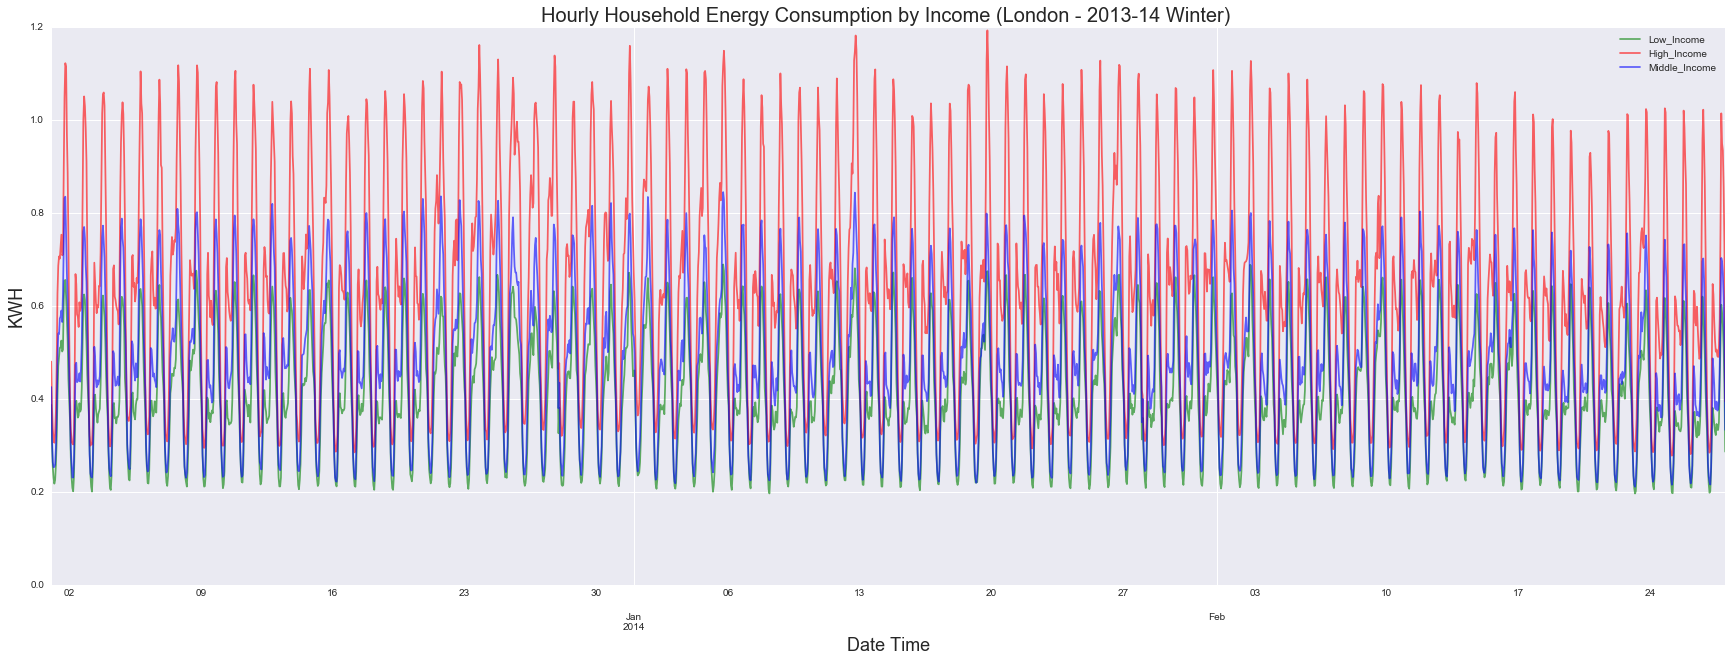

In [9]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

## Merge and plot energy and weather data

In [3]:
#weather = weather.convert_objects(convert_numeric=True)
weather1 = weather[:2136]
weather1.drop('Unnamed: 0', 1, inplace=True)
weather1.head()

NameError: name 'weather' is not defined

In [11]:
energy.reset_index(inplace=True)
energy.head()

,index,Datetime,Low_Income,High_Income,Middle_Income
0,2013-12-01 01:00:00,2013-12-01 01:00:00,0.386444,0.479599,0.424813
1,2013-12-01 02:00:00,2013-12-01 02:00:00,0.301773,0.381671,0.314566
2,2013-12-01 03:00:00,2013-12-01 03:00:00,0.253057,0.335496,0.263379
3,2013-12-01 04:00:00,2013-12-01 04:00:00,0.229611,0.312186,0.252521
4,2013-12-01 05:00:00,2013-12-01 05:00:00,0.217060,0.305041,0.253142


In [12]:
weather1.reset_index(inplace=True)
weather1.head()

,index,Datetime,Dew_Point_F,Temperature_F,Wind_Speed_MPH
0,2013-12-01 00:00:00,2013-12-01 00:00:00,32.0,33.8,4.6
1,2013-12-01 01:00:00,2013-12-01 01:00:00,33.8,33.8,4.6
2,2013-12-01 02:00:00,2013-12-01 02:00:00,33.8,35.6,4.6
3,2013-12-01 03:00:00,2013-12-01 03:00:00,35.6,35.6,4.6
4,2013-12-01 04:00:00,2013-12-01 04:00:00,35.6,37.4,8.1


In [13]:
final2013_14 = pd.merge(weather1, energy, on='index')

In [14]:
final2013_14.drop(['Datetime_x', 'Datetime_y'], 1, inplace=True)
final2013_14.head()

,index,Dew_Point_F,Temperature_F,Wind_Speed_MPH,Low_Income,High_Income,Middle_Income
0,2013-12-01 01:00:00,33.8,33.8,4.6,0.386444,0.479599,0.424813
1,2013-12-01 02:00:00,33.8,35.6,4.6,0.301773,0.381671,0.314566
2,2013-12-01 03:00:00,35.6,35.6,4.6,0.253057,0.335496,0.263379
3,2013-12-01 04:00:00,35.6,37.4,8.1,0.229611,0.312186,0.252521
4,2013-12-01 05:00:00,37.4,39.2,4.6,0.217060,0.305041,0.253142


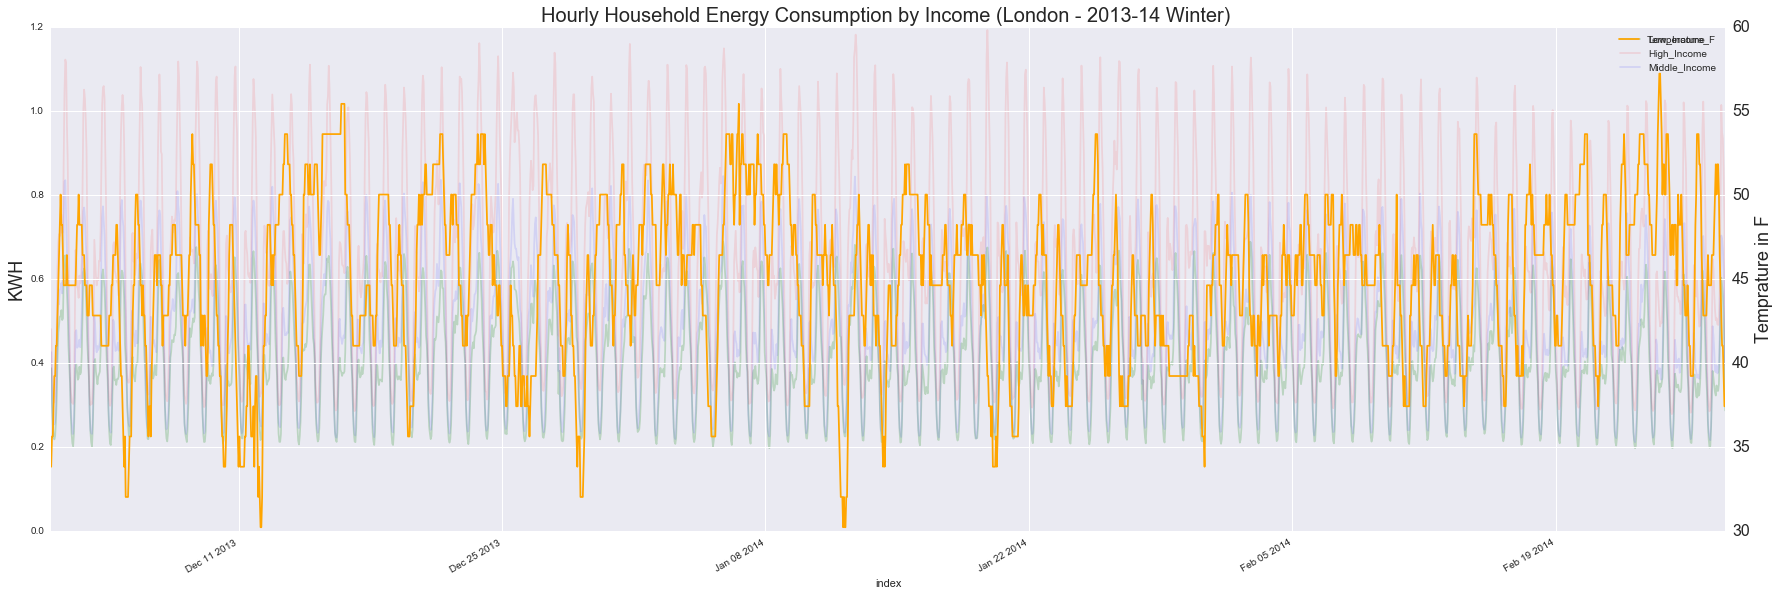

In [15]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013_14.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
final2013_14.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
final2013_14.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
final2013_14.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

## Regress directly Energy x Temperature

In [16]:
#OLS of Low_Income ~ Temperature_F
regress1 = smf.ols(formula = 'Low_Income ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs low income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs low income is  1.02315130986e-11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Low_Income   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     46.80
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.02e-11
Time:                        13:43:44   Log-Likelihood:                 1387.7
No. Observations:                2135   AIC:                            -2771.
Df Residuals:                    2133   BIC:                            -2760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2362      0.026      9.192      0.000         0.186     0.287
Temperature_F     0.0039      0.001      6.841      0.000         0.003     0.005
==============================================================================
Omnibus:                      221.291   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.730
Skew:                           0.250   Prob(JB):                     1.08e-18
Kurtosis:                       2.175   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since regression does not show any correlation, look for alternatives. 
The main reason of energy consumption variability is the daily cycle of energy use. If we offset the daily pattern we can see more clearly how weather (namely Temperature) plays a role on energy consumption.

## Applying seasonal decomposition before regressing

### High_Income

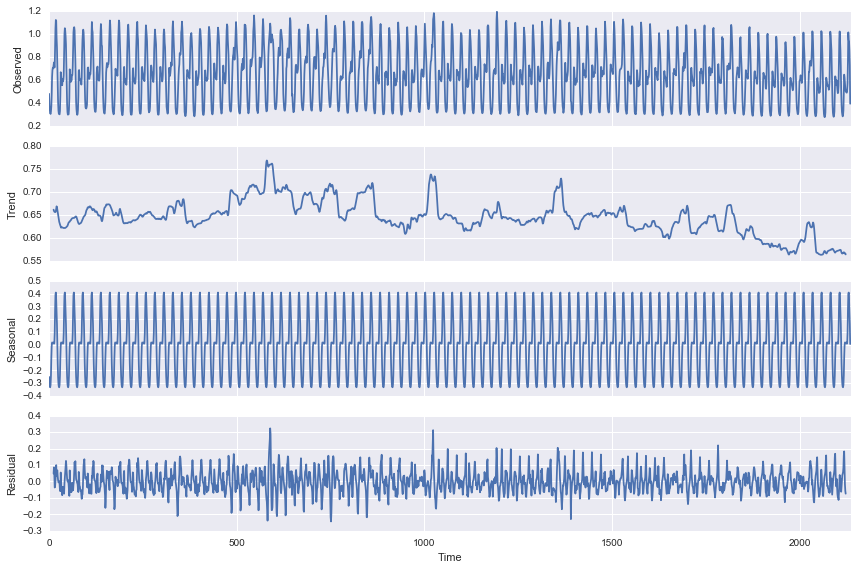

In [32]:
##Seasonal Decomposition of high income energy consumption
data = np.array(final2013_14.High_Income)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(data, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res1.plot()

In [34]:
# renaming "index" column so that it can be accessed
final2013_14.rename(columns ={'index':'DateTime'}, inplace=True)



In [2]:
#Adding the residuals of the seasonal deccomposition to the dataframe
final2013_14['HI_residuals'] = res.observed - res.seasonal
final2013_14.head(30)

NameError: name 'final2013_14' is not defined

In [36]:
#OLS HI_trend ~ Temperature_F
regress2 = smf.ols(formula = 'HI_residuals ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs low income is ', regress2.pvalues[1])
regress2.summary()

pvalue for temperature vs low income is  0.000488954384403


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HI_residuals   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     12.19
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           0.000489
Time:                        14:09:00   Log-Likelihood:                 2443.2
No. Observations:                2135   AIC:                            -4882.
Df Residuals:                    2133   BIC:                            -4871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.6993      0.016     44.625      0.000         0.669     0.730
Temperature_F    -0.0012      0.000     -3.492      0.000        -0.002    -0.001
==============================================================================
Omnibus:                      197.988   Durbin-Watson:                   0.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              336.967
Skew:                           0.654   Prob(JB):                     6.74e-74
Kurtosis:                       4.442   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

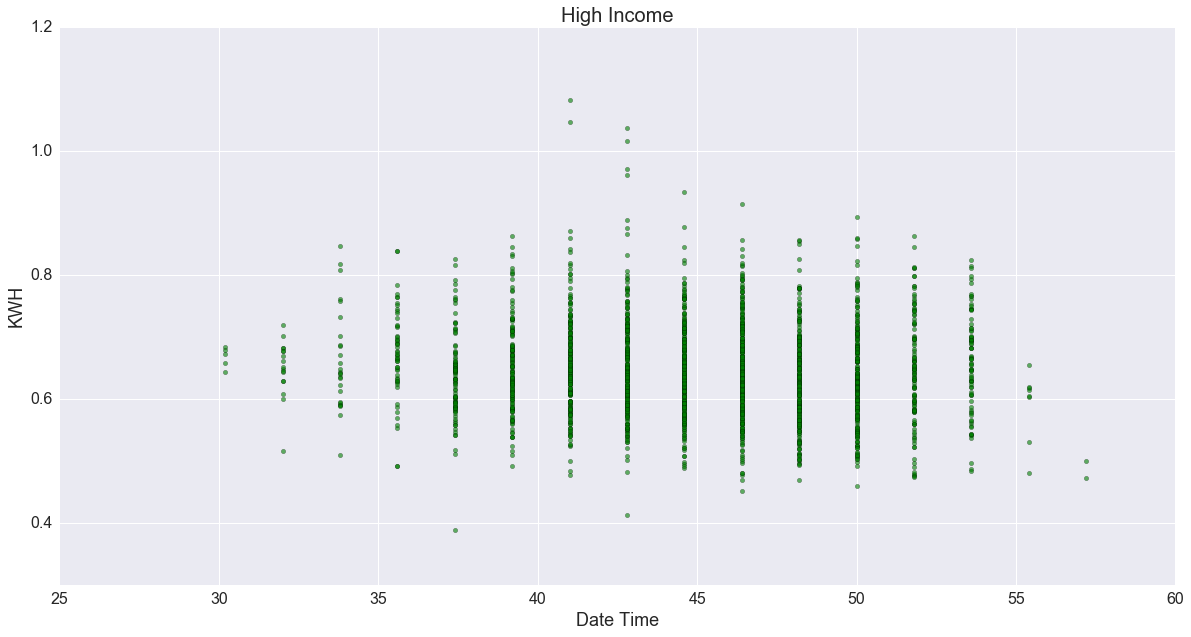

In [51]:
#plotting HI_residuasls and Temperature_F
ax = pl.figure(figsize=(20,10)).add_subplot(111)
final2013_14.plot(x='Temperature_F', y='HI_residuals', kind='scatter', color="green", alpha=.6, ax=ax)
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.title('High Income', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
pl.show()


## Testing different lags for weather and energy consumption data (High Income)

In [177]:
hh=20
i=16
final2013_14.iloc[(hh-1)+(i-12)]

DateTime          2013-12-02 00:00:00
Dew_Point_F                      42.8
Temperature_F                    44.6
Wind_Speed_MPH                    2.3
Low_Income                   0.397325
High_Income                  0.540749
Middle_Income                0.438992
HI_residuals                 0.687521
Name: 23, dtype: object

In [194]:
def plot_lag(hh):

    #peak hour (reference for the lag)
    # hh = 18

    fig = pl.figure(figsize=(20,20))

    for i in range(24):

        pl.subplot(6,4,i+1)

        # adjusting the sizes of the arrays 
        if i <= 35-hh:
            res_init = hh-1
        else:
            res_init = hh-1 + 24

        #debugging
        #print ("i = {0}".format(i))
        #print ("xdim = {0}, ydim = {1}".format(final2013_14.Temperature_F[(hh-1)+(i-12)::24].shape, final2013_14.HI_residuals[res_init::24].shape))

        #OLS
        x = np.array(final2013_14.Temperature_F[(hh-1)+(i-12)::24])
        y = np.array(final2013_14.HI_residuals[res_init::24])
        lm = sm.OLS(y, sm.add_constant(x)).fit()
        ypredict = lm.predict(sm.add_constant(x))

        #plot
        pl.plot(x, y,'.')
        pl.plot(x, ypredict, 'r')
        pl.xticks(fontsize=12)
        pl.yticks(fontsize=12)
        pl.title("lag = {0}, R2 = {1}".format(i-12, lm.rsquared), fontsize=16)
        pl.ylabel("KWH", fontsize=14)
        pl.xlabel("Temperature (F)", fontsize=14)

    pl.tight_layout()
    pl.show()
    
    return 0

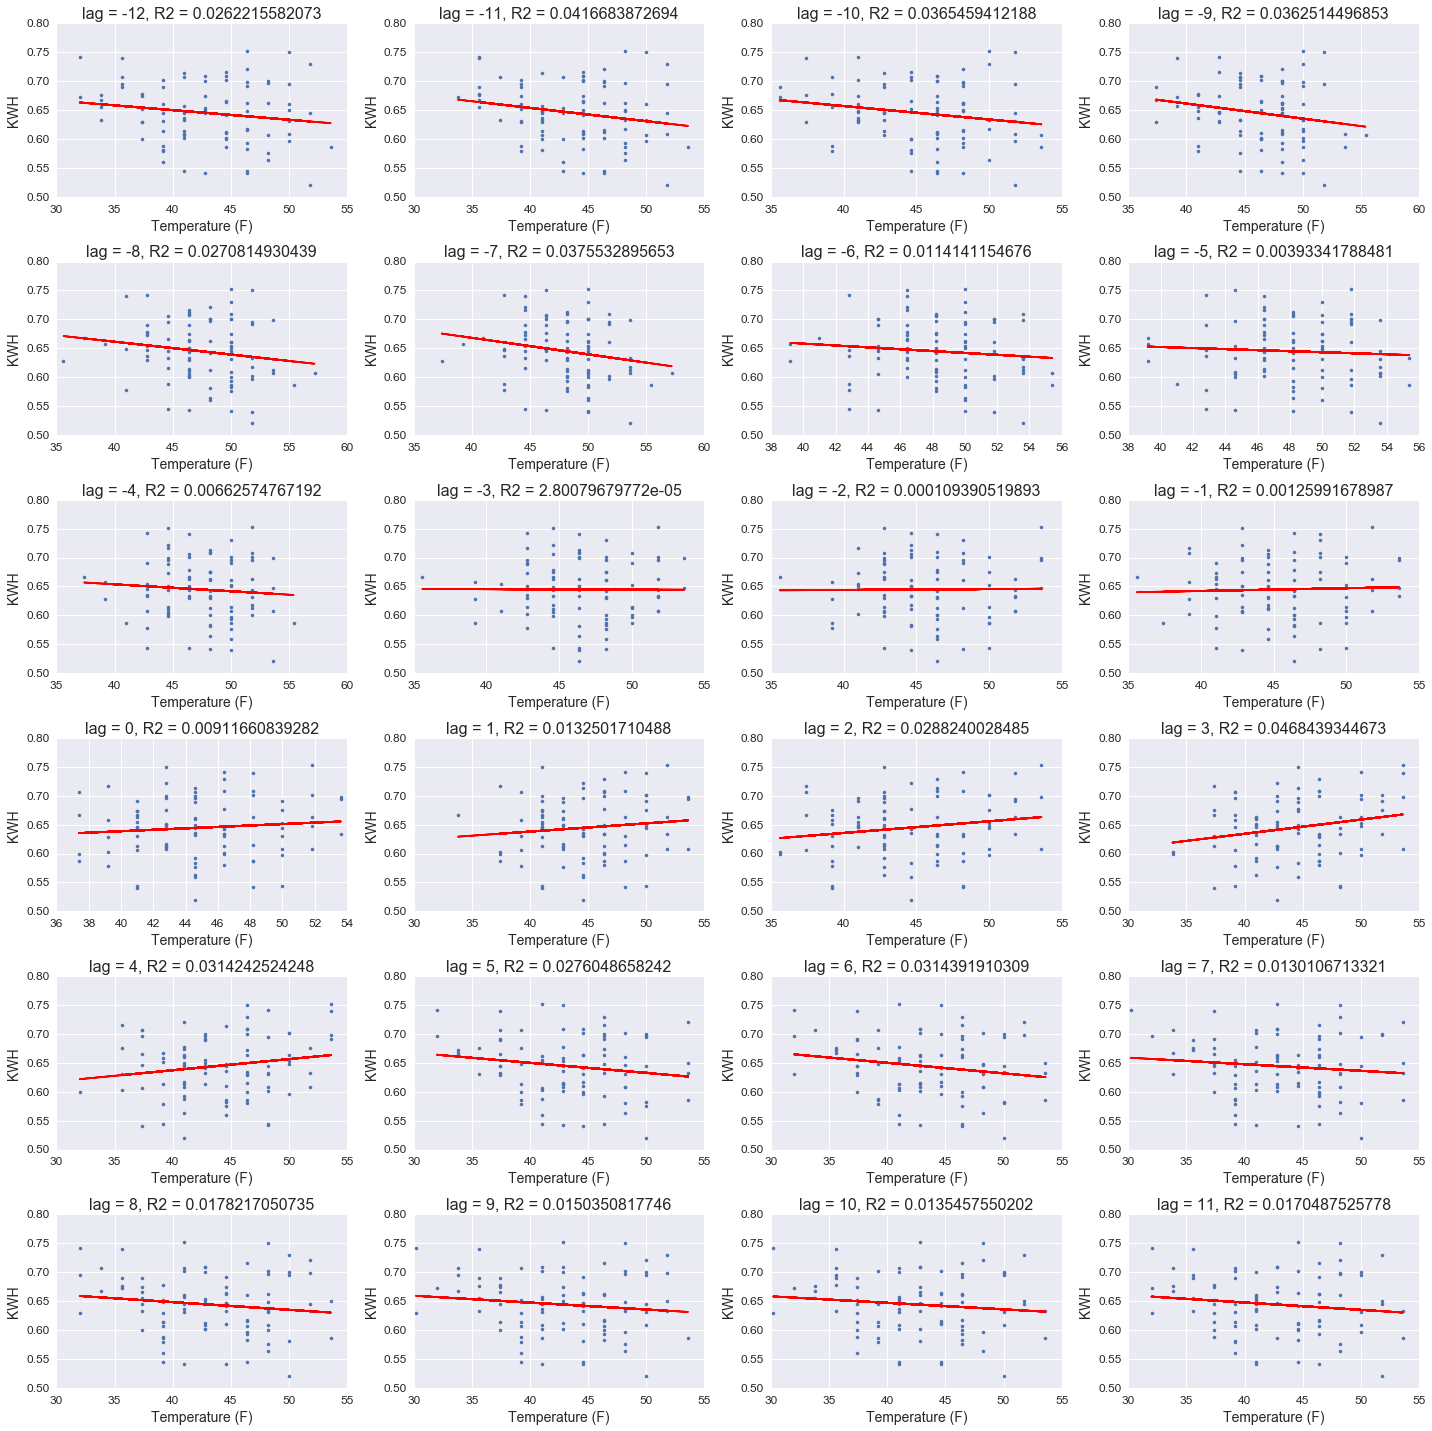

0

In [195]:
plot_lag(19)